# <font color=#225e71>Vectorisation
</font>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#importing the created preprocessin function 
import preprocessing as prp
import re

import operator
import collections

import numpy as np
from scipy.sparse import csr_matrix
from scipy import sparse

from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
from nltk.probability import FreqDist

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB


In [3]:
txt_preprocessing = prp.txt_preprocessing

In [4]:
imdb = pd.read_csv(r'C:\Users\Giorgis\Desktop\Projects\ADTA coursework\partII\imdb_labelled.txt', sep='\t',
                  names=['sentence', 'sentiment'])
imdb.head(10)

,sentence,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted 2 hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [5]:
imdb['sentence_clean'] = imdb['sentence'].apply(lambda x: txt_preprocessing(x))
imdb.head()

,sentence,sentiment,sentence_clean
0,"A very, very, very slow-moving, aimless movie ...",0,"[veri, veri, slowmov, aimless, movi, a, distre..."
1,Not sure who was more lost - the flat characte...,0,"[sure, wa, lost, , flat, charact, the, audienc..."
2,Attempting artiness with black & white and cle...,0,"[attempt, arti, black, , white, clever, camera..."
3,Very little music or anything to speak of.,0,"[littl, music, anyth, speak, , ]"
4,The best scene in the movie was when Gerardo i...,1,"[best, scene, the, movi, when, gerardo, tri, f..."


### <font color=#225e71>Creating the bag of words transformer
</font>

In [6]:
bow_transformer = CountVectorizer(analyzer=txt_preprocessing).fit(imdb['sentence'])

In [7]:
stop_words = (stopwords.words('english'))

In [8]:
# for key in bow_transformer.vocabulary_:
for word in stop_words:
    if word == bow_transformer.vocabulary_.keys():
        bow_transformer.vocabulary_.pop(word)
        print(bow_transformer.vocabulary_)

### <font color=#225e71>This is the SPARSE MATRIX
</font>

In [9]:
imdb_bow = bow_transformer.transform(imdb['sentence'])

In [10]:
sparsity = (100.0 * imdb_bow.nnz / (imdb_bow.shape[0] * imdb_bow.shape[1]))

In [11]:
print('Shape of the Sparse Matrix:\t{}\nNumber of Non Zero occurencies in the Mattrix:\t{}\nSparsity of Matrix:\t{}'.format(imdb_bow.shape, imdb_bow.nnz, round(sparsity, 3)))

Shape of the Sparse Matrix:	(748, 2713)
Number of Non Zero occurencies in the Mattrix:	9271
Sparsity of Matrix:	0.457


### <font color=#225e71>Term frequency
</font>

In [12]:
tfidf_transformer = TfidfTransformer().fit(imdb_bow)

### <font color=#225e71>Inverse frequency
</font>

In [13]:
sentences_tfidf = tfidf_transformer.transform(imdb_bow)

In [14]:
inverse_freq_dict = {}

for i in bow_transformer.vocabulary_:
    inverse_freq_dict[i] = round(tfidf_transformer.idf_[bow_transformer.vocabulary_[i]], 3)
    

In [15]:
a = {k: v for k, v in sorted(inverse_freq_dict.items(), key=lambda item: item[1])}

### <font color=#225e71>Creating the same sparse matrix, this time Using TF-IDF Vectorizer
</font>

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf_vect = TfidfVectorizer(analyzer=txt_preprocessing)
X_tfidf = tfidf_vect.fit_transform(imdb['sentence'])

In [18]:
sparsity_of_X = (100.0 * X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1]))

In [19]:
print('Shape of the Sparse Matrix:\t{}\nNumber of Non Zero occurencies in the Mattrix:\t{}\nSparsity of Matrix:\t{}'.format(X_tfidf.shape, X_tfidf.nnz, round(sparsity, 3)))

Shape of the Sparse Matrix:	(748, 2713)
Number of Non Zero occurencies in the Mattrix:	9271
Sparsity of Matrix:	0.457


#### <font color=#225e71>The two matrices has the same characteristics, the difference is that the X_tfidf has the reverse frequencies, and the imdb_bow has the occurencies. The Inverse Frequency matrix will be used for classification, and the sparse matrix will contribute to the visualisation of the most important features of the document.
</font>

# <font color=#225e71>Descriptive Analytics</font>

In [20]:
sent_name_list = []
c=0
for i in imdb_bow:
    print(i,'\n')
    sent_name_list.append('sentence '+str(c))
    c+=1

  (0, 0)	2
  (0, 110)	1
  (0, 165)	1
  (0, 713)	1
  (0, 746)	1
  (0, 1476)	1
  (0, 1571)	1
  (0, 2142)	1
  (0, 2554)	2
  (0, 2699)	1 

  (0, 0)	3
  (0, 256)	1
  (0, 461)	1
  (0, 963)	1
  (0, 1119)	1
  (0, 1448)	1
  (0, 1599)	1
  (0, 2285)	1
  (0, 2345)	1
  (0, 2583)	1
  (0, 2586)	1
  (0, 2639)	1 

  (0, 0)	5
  (0, 130)	1
  (0, 176)	1
  (0, 200)	1
  (0, 234)	1
  (0, 253)	1
  (0, 300)	1
  (0, 337)	1
  (0, 416)	1
  (0, 505)	1
  (0, 699)	1
  (0, 842)	1
  (0, 1425)	1
  (0, 1571)	1
  (0, 1635)	1
  (0, 1794)	1
  (0, 1808)	1
  (0, 1959)	1
  (0, 2345)	2
  (0, 2634)	1 

  (0, 0)	2
  (0, 214)	1
  (0, 1431)	1
  (0, 1582)	1
  (0, 2185)	1 

  (0, 0)	2
  (0, 323)	1
  (0, 946)	1
  (0, 1053)	1
  (0, 1143)	1
  (0, 1165)	1
  (0, 1348)	1
  (0, 1571)	1
  (0, 1989)	1
  (0, 2016)	1
  (0, 2169)	1
  (0, 2345)	1
  (0, 2442)	1
  (0, 2626)	1 

  (0, 0)	2
  (0, 233)	1
  (0, 469)	1
  (0, 807)	2
  (0, 1107)	1
  (0, 1305)	2
  (0, 1372)	1
  (0, 1504)	1
  (0, 1571)	1
  (0, 1945)	1
  (0, 2345)	1
  (0, 2666)	1 

  (0, 0)

  (0, 2181)	1 

  (0, 0)	2
  (0, 265)	1
  (0, 810)	1
  (0, 877)	1
  (0, 1031)	1
  (0, 1343)	1
  (0, 2310)	1
  (0, 2345)	2 

  (0, 0)	2
  (0, 110)	1
  (0, 137)	1
  (0, 560)	1
  (0, 581)	1
  (0, 610)	1
  (0, 612)	2
  (0, 616)	1
  (0, 752)	1
  (0, 777)	1
  (0, 894)	1
  (0, 1065)	1
  (0, 1232)	1
  (0, 1421)	1
  (0, 1672)	1
  (0, 1832)	1 

  (0, 0)	2
  (0, 511)	1
  (0, 748)	1
  (0, 1084)	1
  (0, 1452)	1
  (0, 2138)	1
  (0, 2326)	1 

  (0, 0)	2
  (0, 110)	1
  (0, 264)	1
  (0, 380)	1
  (0, 472)	1
  (0, 770)	1
  (0, 938)	1
  (0, 1198)	1
  (0, 1421)	1
  (0, 1466)	1
  (0, 1571)	1
  (0, 2102)	1
  (0, 2271)	1
  (0, 2338)	1
  (0, 2569)	1 

  (0, 0)	2
  (0, 1906)	1 

  (0, 0)	2
  (0, 176)	1
  (0, 464)	1
  (0, 526)	1
  (0, 1112)	1
  (0, 1300)	1
  (0, 1431)	1
  (0, 1627)	1
  (0, 2032)	1
  (0, 2338)	1
  (0, 2392)	1
  (0, 2481)	1
  (0, 2597)	1 

  (0, 0)	2
  (0, 239)	1
  (0, 654)	1
  (0, 938)	1
  (0, 1305)	1
  (0, 1395)	1
  (0, 1435)	1
  (0, 1696)	1
  (0, 2338)	1 

  (0, 0)	2
  (0, 296)	1
  (0, 365)	1
 

In [21]:
myS = []
for i in range(0, imdb_bow.shape[0]):
    sent_name_list[i] = sparse.coo_matrix(imdb_bow[i])
    myS.append(pd.Series.sparse.from_coo(sent_name_list[i]))

In [22]:
no = 0
df_list = []
for i in myS:
    name = 'Sentence '+ str(no)
    df_list.append(pd.DataFrame(i, columns=[name]))
    no+=1

In [23]:
for i in range(0, len(df_list)):
    df_list[i] = df_list[i].reset_index()
    df_list[i] = df_list[i].drop(['level_0'], axis=1)
    df_list[i] = df_list[i].rename(columns={'level_1': 'Words_no'})


In [24]:
new_df = pd.merge(df_list[0], df_list[1], on='Words_no', how='outer')


In [25]:
for i in range(2, len(df_list)):
    new_df = pd.merge(new_df, df_list[i], on='Words_no', how='outer')

In [26]:
new_df = new_df.fillna(0)
new_df = new_df.sort_values('Words_no')
new_df["sum"] = new_df.sum(axis=1)

In [27]:
top10 = new_df.sort_values('sum', ascending=False).head(13)

In [28]:
top10_sum = top10[['Words_no', 'sum']]
# top10_sum = top10_sum.set_index('Words')
top10_sum = top10_sum.reset_index(drop=True)

In [29]:
top10_sum['Words_no'][0]

2345

In [30]:
word_txt = []
for i in range(0, top10_sum.shape[0]):
    word_txt.append(bow_transformer.get_feature_names()[top10_sum['Words_no'][i]])
    
top10_sum["words"] = word_txt

In [31]:
top10_sum = top10_sum.drop([2, 8, 10])
top10_sum = top10_sum.reset_index(drop=True)

In [32]:
top10_sum

,Words_no,sum,words
0,2345,2755.0,the
1,2695,2726.0,you
2,2701,2713.0,your
3,2711,2712.0,zombiez
4,2710,2711.0,zombiestud
5,2692,2710.0,year
6,2709,2710.0,zombi
7,2708,2709.0,zillion
8,2705,2706.0,yun
9,2704,2705.0,youv


In [33]:
top10 = top10.reset_index(drop=True)

In [34]:
no0 = pd.DataFrame(top10.iloc[0])
no0.describe()

,0
count,750.0
unique,13.0
top,0.0
freq,506.0


In [35]:
max_print = (imdb_bow.getmaxprint())

In [36]:
df = imdb[['sentiment', 'sentence_clean']]
df.head(3)

,sentiment,sentence_clean
0,0,"[veri, veri, slowmov, aimless, movi, a, distre..."
1,0,"[sure, wa, lost, , flat, charact, the, audienc..."
2,0,"[attempt, arti, black, , white, clever, camera..."


In [37]:
df['processed'] = [' '.join(map(str,l)) for l in df['sentence_clean']]
df.head(3)

,sentiment,sentence_clean,processed
0,0,"[veri, veri, slowmov, aimless, movi, a, distre...",veri veri slowmov aimless movi a distress drif...
1,0,"[sure, wa, lost, , flat, charact, the, audienc...",sure wa lost flat charact the audienc nearli ...
2,0,"[attempt, arti, black, , white, clever, camera...",attempt arti black white clever camera angl m...


In [38]:
words = df['sentence_clean']
allwords = []

for w in words:
    allwords += w

In [39]:
my_words = []
for i in allwords:
    if '' != i and "\t" not in i:
        my_words.append(i)


In [40]:
for w in stop_words:
    for i in my_words:
        if w == i:
            my_words.remove(w)


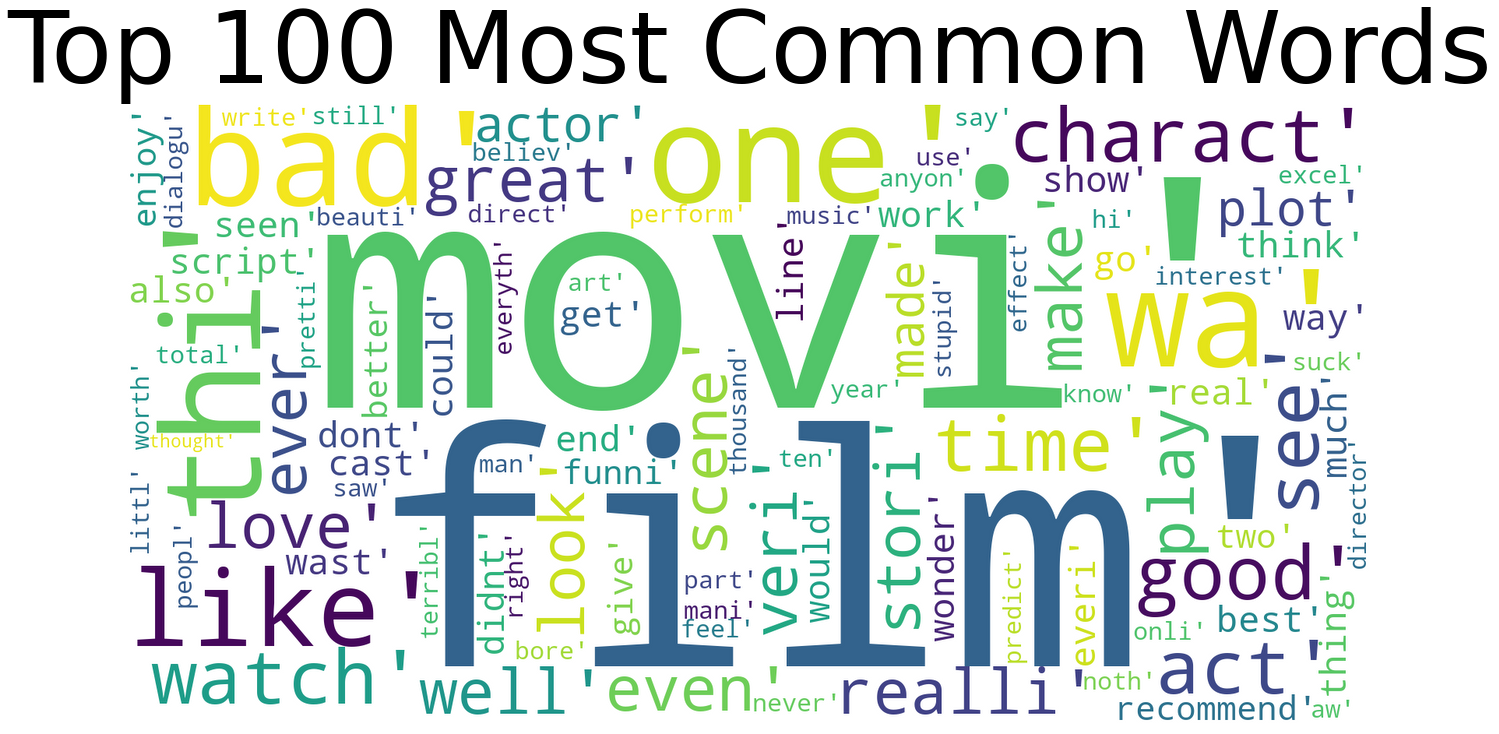

<Figure size 432x288 with 0 Axes>

In [41]:
mostcommon = FreqDist(my_words).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="lanczos")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

plt.savefig('top100.png')


In [42]:
top25w = pd.DataFrame(mostcommon)
top10w = top25w.iloc[:10]
top10w = top10w.rename({0:'Words', 1:'Occurencies'}, axis=1)
top10w

,Words,Occurencies
0,movi,207
1,film,184
2,one,91
3,thi,87
4,wa,67
5,bad,66
6,like,59
7,charact,58
8,good,56
9,time,49


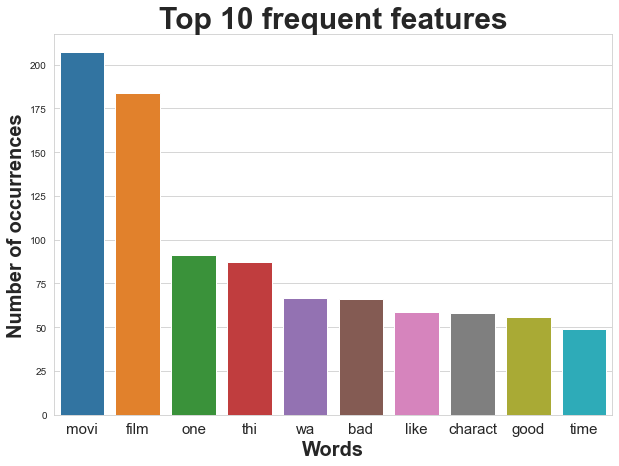

In [43]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

ax = sns.barplot(x='Words', y='Occurencies', data=top10w)

ax.set_xlabel('Words', size=20, fontweight='bold')
ax.set_ylabel('Number of occurrences', size=20, fontweight='bold')
ax.set_title("Top 10 frequent features", size=30, fontweight='bold')

plt.setp(ax.get_xticklabels(), rotation=0, size=15)

plt.savefig('top10.png')


### <font color=#225e71>Top 10 Most common words for Label 1
</font>

In [44]:
df_1 = df[(df['sentiment'] == 1)]
df_1.head(2)

,sentiment,sentence_clean,processed
4,1,"[best, scene, the, movi, when, gerardo, tri, f...",best scene the movi when gerardo tri find song...
7,1,"[saw, movi, today, thought, wa, good, effort, ...",saw movi today thought wa good effort good mes...


In [45]:
words = df_1['sentence_clean']
allwords = []

for w in words:
    allwords += w

In [46]:
my_words_1 = []
for i in allwords:
    if '' != i and "\t" not in i:
        my_words_1.append(i)


In [47]:
for w in stop_words:
    for i in my_words_1:
        if w == i:
            my_words_1.remove(w)


In [48]:
mostcommon_small1 = FreqDist(my_words_1).most_common(25)

top25w1 = pd.DataFrame(mostcommon_small1)
top10w1 = top25w1.iloc[:10]
top10w1 = top10w1.rename({0:'Words', 1:'Occurencies'}, axis=1)
top10w1

,Words,Occurencies
0,movi,101
1,film,98
2,one,41
3,good,35
4,like,34
5,thi,34
6,charact,33
7,wa,26
8,love,26
9,great,26


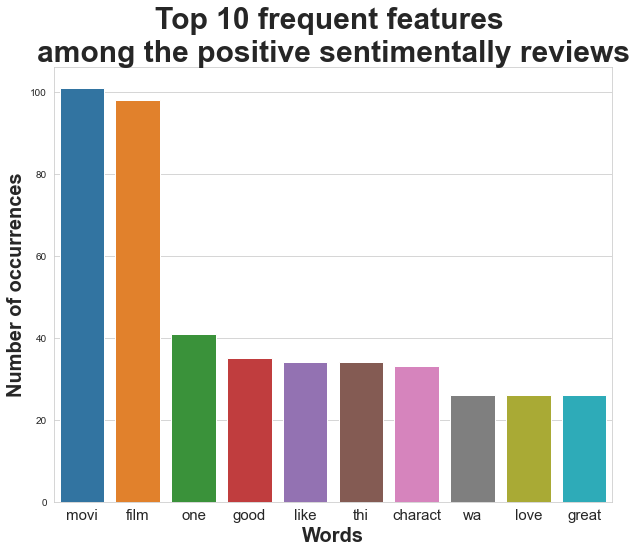

In [49]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')

ax = sns.barplot(x='Words', y='Occurencies', data=top10w1)

ax.set_xlabel('Words', size=20, fontweight='bold')
ax.set_ylabel('Number of occurrences', size=20, fontweight='bold')
ax.set_title("Top 10 frequent features \namong the positive sentimentally reviews", size=30, fontweight='bold')

plt.setp(ax.get_xticklabels(), rotation=0, size=15)

plt.savefig('top10lab1.png')


### <font color=#225e71>Top 10 Most common words for Label 0
</font>

In [50]:
df_0 = df[(df['sentiment'] == 0)]
df_0.head(2)

,sentiment,sentence_clean,processed
0,0,"[veri, veri, slowmov, aimless, movi, a, distre...",veri veri slowmov aimless movi a distress drif...
1,0,"[sure, wa, lost, , flat, charact, the, audienc...",sure wa lost flat charact the audienc nearli ...


In [51]:
words = df_0['sentence_clean']
allwords = []

for w in words:
    allwords += w

In [52]:
my_words_0 = []
for i in allwords:
    if '' != i and "\t" not in i:
        my_words_0.append(i)


In [53]:
for w in stop_words:
    for i in my_words_0:
        if w == i:
            my_words_0.remove(w)


In [54]:
mostcommon_small0 = FreqDist(my_words_0).most_common(25)

top25w0 = pd.DataFrame(mostcommon_small0)
top10w0 = top25w0.iloc[:10]
top10w0 = top10w0.rename({0:'Words', 1:'Occurencies'}, axis=1)
top10w0

,Words,Occurencies
0,movi,106
1,film,86
2,bad,59
3,thi,53
4,one,50
5,wa,41
6,even,31
7,time,29
8,watch,26
9,charact,25


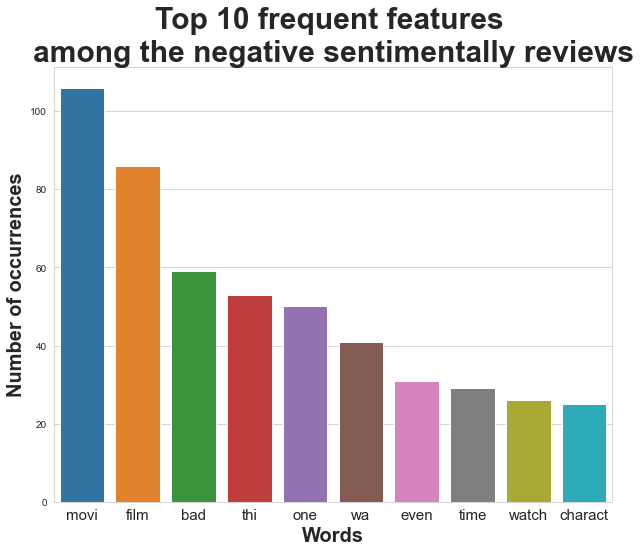

In [55]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')

ax = sns.barplot(x='Words', y='Occurencies', data=top10w0)

ax.set_xlabel('Words', size=20, fontweight='bold')
ax.set_ylabel('Number of occurrences', size=20, fontweight='bold')
ax.set_title("Top 10 frequent features \namong the negative sentimentally reviews", size=30, fontweight='bold')

plt.setp(ax.get_xticklabels(), rotation=0, size=15)

plt.savefig('top10lab0.png')


# <font color=#225e71>Clustering</font>

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score

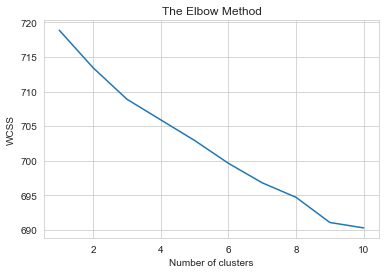

In [57]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X_tfidf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [58]:
def clustering_kmeans(clusters, max_iter, n_init):
    
    model = KMeans(n_clusters=clusters, init='k-means++', max_iter=max_iter, n_init=n_init)
    model.fit(X_tfidf)
    
    cluster_centers = model.cluster_centers_
    identified_clusters = model.fit_predict(X_tfidf)
    
    data_with_clusters = imdb.copy()
    data_with_clusters['Cluster'] = identified_clusters
    
    return data_with_clusters
    

In [59]:
def words_occurencies_by_cluster(dataset, Title, pictName, figSize):
    cluster_count = len(dataset['Cluster'].unique())
    mydflist = []
    regd = []
    for cluster in range(0, cluster_count):
        datasetX = dataset[(dataset['Cluster'] == cluster)]
        
        words_of_dataset = datasetX[["sentence_clean", 'Cluster']]
        allwords = []
        
        for w in words_of_dataset['sentence_clean']:
            allwords+=w
        
        my_words = []
        for i in allwords:
            if '' != i and "\t" not in i:
                my_words.append(i)
                
        for w in stop_words:
            for i in my_words:
                if w == i:
                    my_words.remove(w)
        
        mostcommon_small = FreqDist(my_words).most_common(10)
        top10d = pd.DataFrame(mostcommon_small)
        top10d = top10d.rename({0:'Words', 1:'Occurrences'}, axis=1)
        top10d.insert(column='Cluster', loc=top10d.shape[-1], value=cluster)
        mydflist.append(top10d)
        regd.append('Cluster '+ str(cluster))
    
    
    top10_of_clusters = mydflist[0]
    for i in range(1, len(mydflist)):
        top10_of_clusters = pd.concat([top10_of_clusters, mydflist[i]])
        
    plt.figure(figsize=figSize)
    sns.set_style('whitegrid')

    ax = sns.barplot(x='Words', y='Occurrences', data=top10_of_clusters, hue='Cluster')

    ax.set_xlabel('Words', size=20, fontweight='bold')
    ax.set_ylabel('Number of occurrences', size=20, fontweight='bold')
    
    leg = plt.legend(fontsize='x-large', loc=1)
    
    i=0
    for reg in regd:
        leg.get_texts()[i].set_text(reg)
        i+=1

#     fig.tight_layout()
#     sns.despine()

    
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right', size=15)
    
    ax.set_title(Title, size=30, fontweight='bold')
    pictName = pictName + '.png'
    plt.savefig(pictName)


# <font color=#225e71>2 Clusters</font> 

In [60]:
two_cl = clustering_kmeans(2, 200, 10)
two_cl

,sentence,sentiment,sentence_clean,Cluster
0,"A very, very, very slow-moving, aimless movie ...",0,"[veri, veri, slowmov, aimless, movi, a, distre...",1
1,Not sure who was more lost - the flat characte...,0,"[sure, wa, lost, , flat, charact, the, audienc...",0
2,Attempting artiness with black & white and cle...,0,"[attempt, arti, black, , white, clever, camera...",0
3,Very little music or anything to speak of.,0,"[littl, music, anyth, speak, , ]",0
4,The best scene in the movie was when Gerardo i...,1,"[best, scene, the, movi, when, gerardo, tri, f...",1
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,"[just, got, bore, watch, jessic, lang, take, c...",0
744,"Unfortunately, any virtue in this film's produ...",0,"[unfortun, virtu, thi, film, product, work, lo...",0
745,"In a word, it is embarrassing.",0,"[a, word, is, embarrass, , ]",0
746,Exceptionally bad!,0,"[except, bad, , ]",0


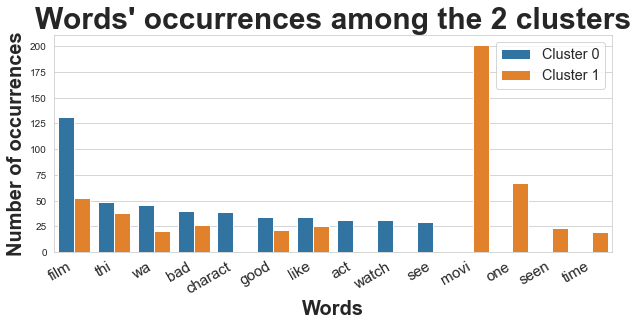

In [61]:
words_occurencies_by_cluster(two_cl, "Words' occurrences among the 2 clusters", '2cluster_occurrences', (10,4))

# <font color=#225e71>3 Clusters</font> 

In [62]:
three_cl = clustering_kmeans(3, 300, 10)
three_cl

,sentence,sentiment,sentence_clean,Cluster
0,"A very, very, very slow-moving, aimless movie ...",0,"[veri, veri, slowmov, aimless, movi, a, distre...",0
1,Not sure who was more lost - the flat characte...,0,"[sure, wa, lost, , flat, charact, the, audienc...",1
2,Attempting artiness with black & white and cle...,0,"[attempt, arti, black, , white, clever, camera...",1
3,Very little music or anything to speak of.,0,"[littl, music, anyth, speak, , ]",1
4,The best scene in the movie was when Gerardo i...,1,"[best, scene, the, movi, when, gerardo, tri, f...",0
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,"[just, got, bore, watch, jessic, lang, take, c...",1
744,"Unfortunately, any virtue in this film's produ...",0,"[unfortun, virtu, thi, film, product, work, lo...",2
745,"In a word, it is embarrassing.",0,"[a, word, is, embarrass, , ]",0
746,Exceptionally bad!,0,"[except, bad, , ]",1


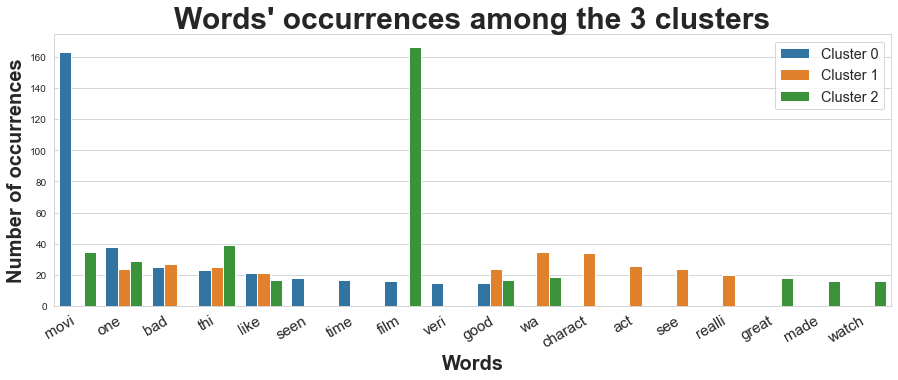

In [63]:
words_occurencies_by_cluster(three_cl, "Words' occurrences among the 3 clusters", '3cluster_occurrences', (15,5))

# <font color=#225e71>5 Clusters</font> 

In [64]:
five_cl = clustering_kmeans(5, 400, 10)
five_cl

,sentence,sentiment,sentence_clean,Cluster
0,"A very, very, very slow-moving, aimless movie ...",0,"[veri, veri, slowmov, aimless, movi, a, distre...",4
1,Not sure who was more lost - the flat characte...,0,"[sure, wa, lost, , flat, charact, the, audienc...",0
2,Attempting artiness with black & white and cle...,0,"[attempt, arti, black, , white, clever, camera...",3
3,Very little music or anything to speak of.,0,"[littl, music, anyth, speak, , ]",4
4,The best scene in the movie was when Gerardo i...,1,"[best, scene, the, movi, when, gerardo, tri, f...",3
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,"[just, got, bore, watch, jessic, lang, take, c...",4
744,"Unfortunately, any virtue in this film's produ...",0,"[unfortun, virtu, thi, film, product, work, lo...",4
745,"In a word, it is embarrassing.",0,"[a, word, is, embarrass, , ]",2
746,Exceptionally bad!,0,"[except, bad, , ]",4


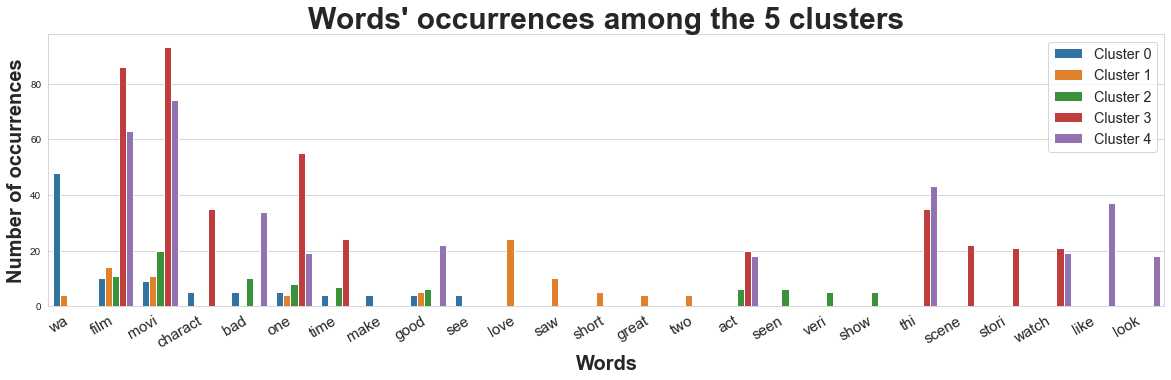

In [65]:
words_occurencies_by_cluster(five_cl, "Words' occurrences among the 5 clusters", '5cluster_occurrences', (20,5))

# <font color=#225e71>6 Clusters</font> 

In [66]:
six_cl = clustering_kmeans(6, 400, 10)
six_cl

,sentence,sentiment,sentence_clean,Cluster
0,"A very, very, very slow-moving, aimless movie ...",0,"[veri, veri, slowmov, aimless, movi, a, distre...",1
1,Not sure who was more lost - the flat characte...,0,"[sure, wa, lost, , flat, charact, the, audienc...",0
2,Attempting artiness with black & white and cle...,0,"[attempt, arti, black, , white, clever, camera...",0
3,Very little music or anything to speak of.,0,"[littl, music, anyth, speak, , ]",5
4,The best scene in the movie was when Gerardo i...,1,"[best, scene, the, movi, when, gerardo, tri, f...",0
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,"[just, got, bore, watch, jessic, lang, take, c...",5
744,"Unfortunately, any virtue in this film's produ...",0,"[unfortun, virtu, thi, film, product, work, lo...",4
745,"In a word, it is embarrassing.",0,"[a, word, is, embarrass, , ]",1
746,Exceptionally bad!,0,"[except, bad, , ]",2


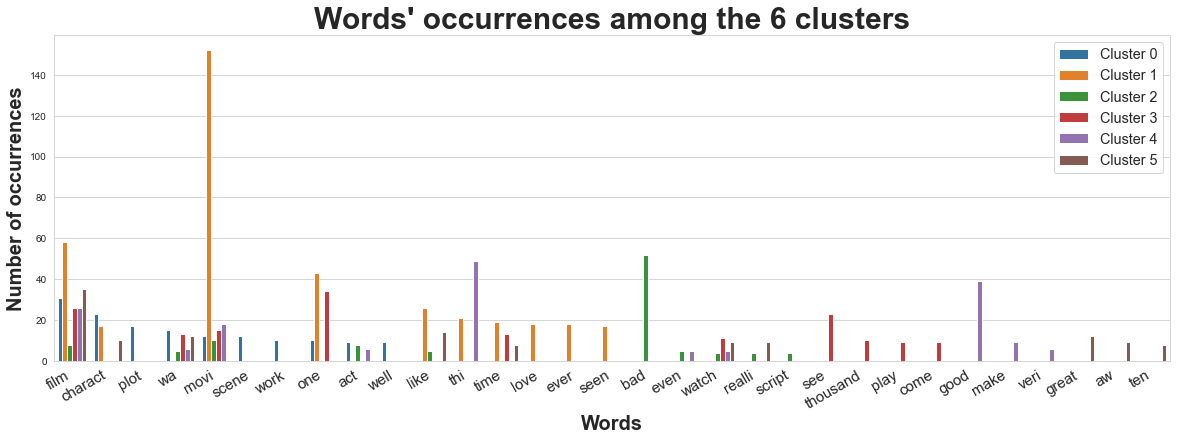

In [67]:
words_occurencies_by_cluster(six_cl, "Words' occurrences among the 6 clusters", '6cluster_occurrences', (20,6))

# <font color=#225e71>7 Clusters</font> 

In [68]:
sev_cl = clustering_kmeans(7, 400, 10)
sev_cl

,sentence,sentiment,sentence_clean,Cluster
0,"A very, very, very slow-moving, aimless movie ...",0,"[veri, veri, slowmov, aimless, movi, a, distre...",5
1,Not sure who was more lost - the flat characte...,0,"[sure, wa, lost, , flat, charact, the, audienc...",3
2,Attempting artiness with black & white and cle...,0,"[attempt, arti, black, , white, clever, camera...",3
3,Very little music or anything to speak of.,0,"[littl, music, anyth, speak, , ]",1
4,The best scene in the movie was when Gerardo i...,1,"[best, scene, the, movi, when, gerardo, tri, f...",3
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,"[just, got, bore, watch, jessic, lang, take, c...",1
744,"Unfortunately, any virtue in this film's produ...",0,"[unfortun, virtu, thi, film, product, work, lo...",0
745,"In a word, it is embarrassing.",0,"[a, word, is, embarrass, , ]",5
746,Exceptionally bad!,0,"[except, bad, , ]",1


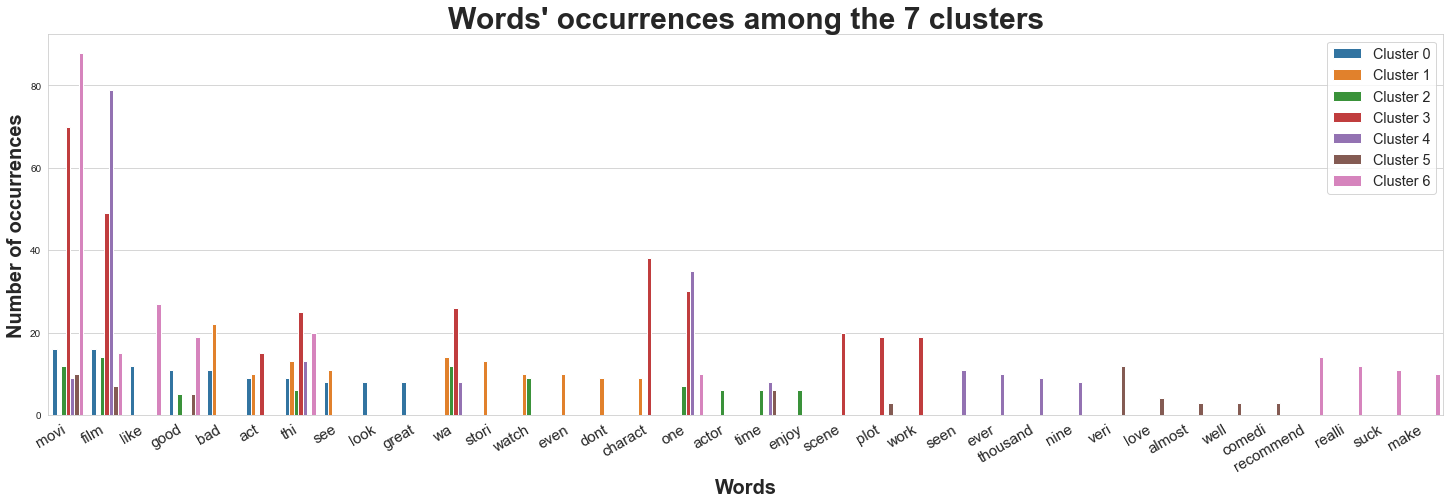

In [69]:
words_occurencies_by_cluster(sev_cl, "Words' occurrences among the 7 clusters", '7cluster_occurrences', (25,7))

# <font color=#225e71>8 Clusters</font> 

In [70]:
eight_cl = clustering_kmeans(8, 400, 10)
eight_cl

,sentence,sentiment,sentence_clean,Cluster
0,"A very, very, very slow-moving, aimless movie ...",0,"[veri, veri, slowmov, aimless, movi, a, distre...",6
1,Not sure who was more lost - the flat characte...,0,"[sure, wa, lost, , flat, charact, the, audienc...",5
2,Attempting artiness with black & white and cle...,0,"[attempt, arti, black, , white, clever, camera...",7
3,Very little music or anything to speak of.,0,"[littl, music, anyth, speak, , ]",2
4,The best scene in the movie was when Gerardo i...,1,"[best, scene, the, movi, when, gerardo, tri, f...",3
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,"[just, got, bore, watch, jessic, lang, take, c...",1
744,"Unfortunately, any virtue in this film's produ...",0,"[unfortun, virtu, thi, film, product, work, lo...",0
745,"In a word, it is embarrassing.",0,"[a, word, is, embarrass, , ]",5
746,Exceptionally bad!,0,"[except, bad, , ]",4


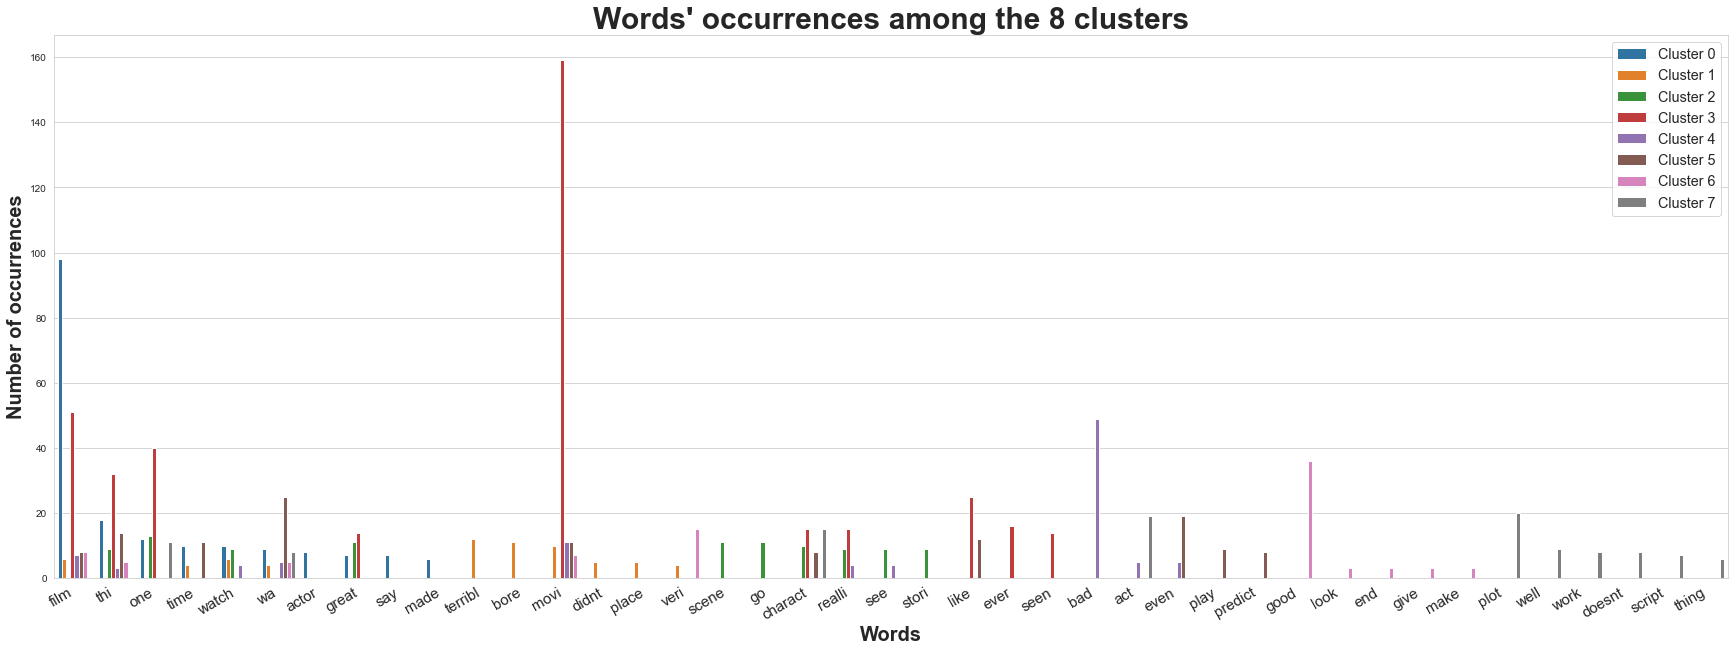

In [71]:
words_occurencies_by_cluster(eight_cl, "Words' occurrences among the 8 clusters", '8cluster_occurrences', (30,10))

# <font color=#225e71>9 Clusters</font> 

In [72]:
nine_cl = clustering_kmeans(9, 400, 10)
nine_cl

,sentence,sentiment,sentence_clean,Cluster
0,"A very, very, very slow-moving, aimless movie ...",0,"[veri, veri, slowmov, aimless, movi, a, distre...",2
1,Not sure who was more lost - the flat characte...,0,"[sure, wa, lost, , flat, charact, the, audienc...",3
2,Attempting artiness with black & white and cle...,0,"[attempt, arti, black, , white, clever, camera...",8
3,Very little music or anything to speak of.,0,"[littl, music, anyth, speak, , ]",6
4,The best scene in the movie was when Gerardo i...,1,"[best, scene, the, movi, when, gerardo, tri, f...",0
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,"[just, got, bore, watch, jessic, lang, take, c...",6
744,"Unfortunately, any virtue in this film's produ...",0,"[unfortun, virtu, thi, film, product, work, lo...",4
745,"In a word, it is embarrassing.",0,"[a, word, is, embarrass, , ]",2
746,Exceptionally bad!,0,"[except, bad, , ]",1


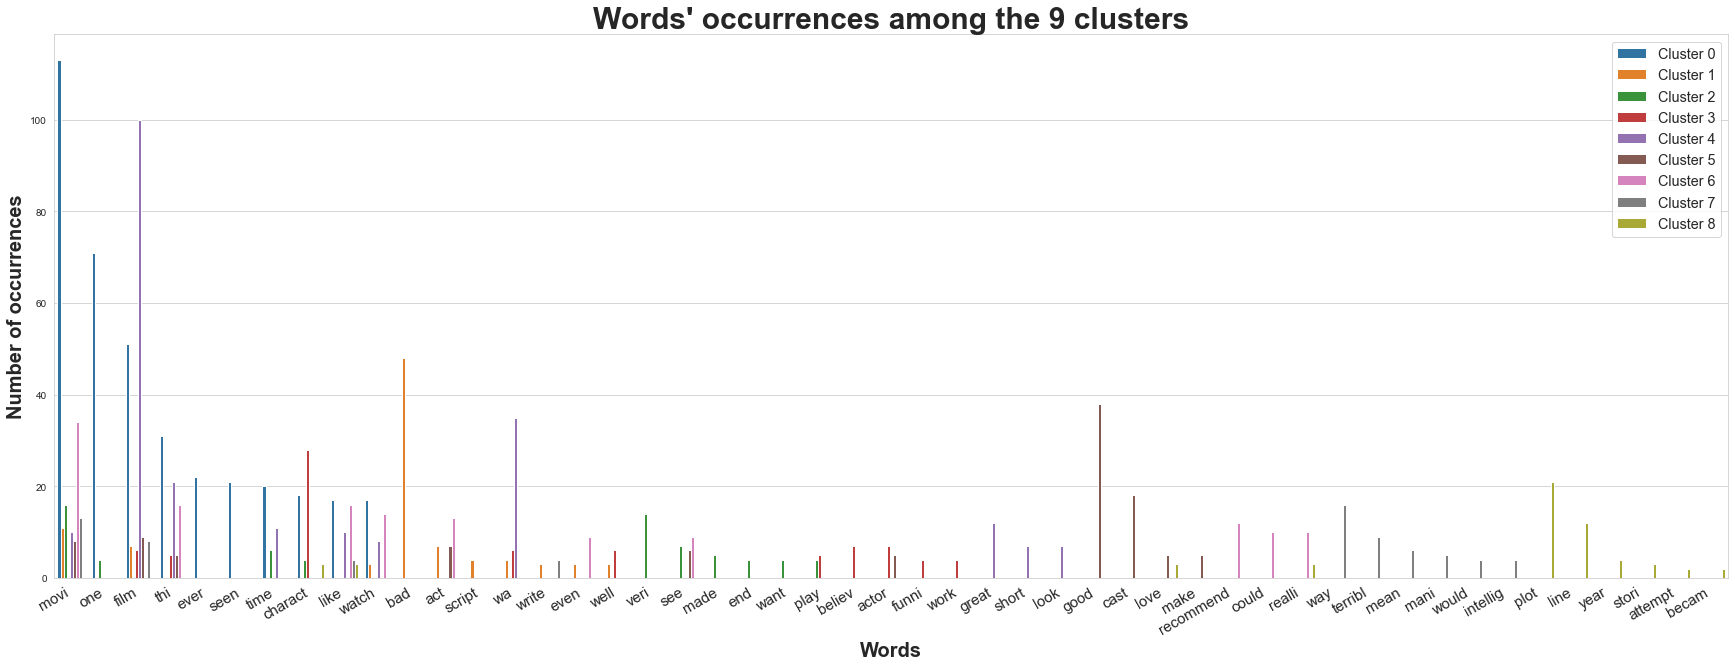

In [73]:
words_occurencies_by_cluster(nine_cl, "Words' occurrences among the 9 clusters", '9cluster_occurrences', (30,10))

# <font color=#225e71>Classification</font> 


### <font color=#225e71>Random Forest</font> 


In [74]:
X_features = pd.DataFrame(sentences_tfidf.toarray())

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_features, imdb['sentiment'], test_size=0.2)

In [103]:
rf = RandomForestClassifier(max_depth=10)
rf_model = rf.fit(X_train, y_train)

In [104]:
y_pred = rf_model.predict(X_test)

In [105]:
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
print('Precision for 0 label: {} \nRecall for 0 label: {}'.format(round(precision, 3), round(recall, 3)))

Precision for 0 label: 0.833 
Recall for 0 label: 0.486


In [106]:
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
print('Precision for 1 label: {} \nRecall for 1 label: {}'.format(round(precision, 3), round(recall, 3)))

Precision for 1 label: 0.657 
Recall for 1 label: 0.91


In [107]:
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
print('Classification report:\n {}'.format(classification_report(y_test, y_pred)))
print('\n')
print('Model\'s accuracy:\n {}'.format(round(accuracy_score(y_test, y_pred),2)))

Confusion matrix:
 [[35 37]
 [ 7 71]]


Classification report:
               precision    recall  f1-score   support

           0       0.83      0.49      0.61        72
           1       0.66      0.91      0.76        78

    accuracy                           0.71       150
   macro avg       0.75      0.70      0.69       150
weighted avg       0.74      0.71      0.69       150



Model's accuracy:
 0.71


### <font color=#225e71>Decision Trees</font> 


In [108]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=100, min_samples_leaf=30, max_depth=10)
clf.fit(X_train,y_train)

predict3 = clf.predict(X_train, check_input=True)


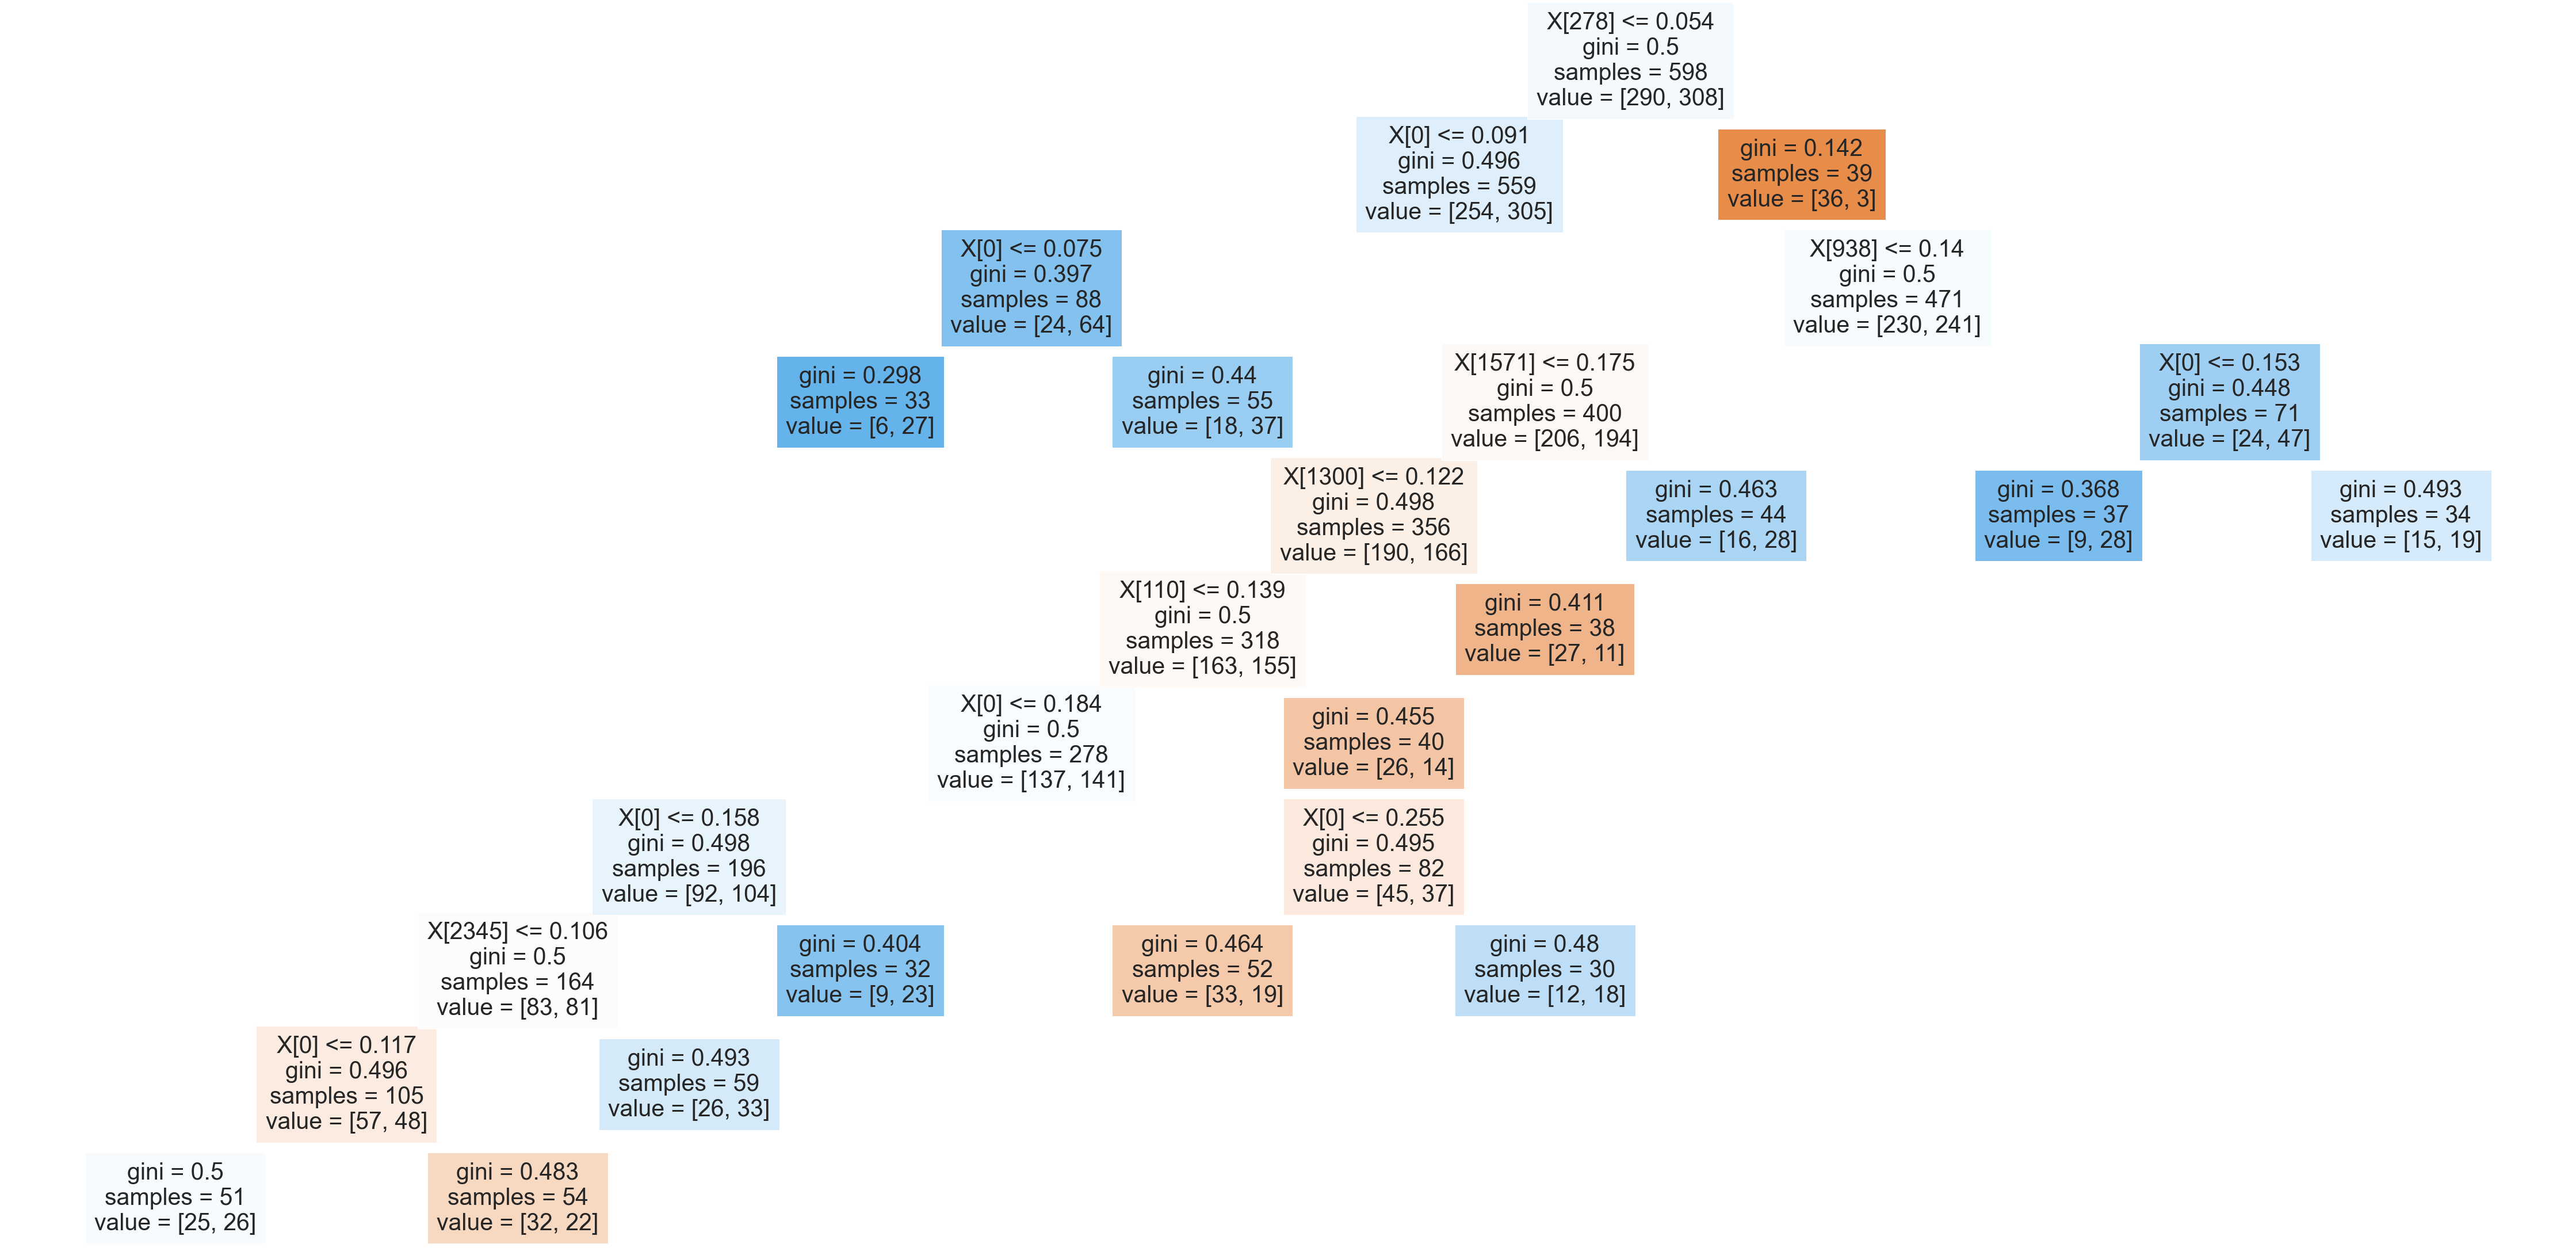

In [109]:
fig = plt.figure(figsize=(80,40))
_ = tree.plot_tree(clf,
                   filled=True)

In [110]:
predictions = clf.predict(X_test)

In [111]:
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, predictions)))
print('\n')
print('Classification report:\n {}'.format(classification_report(y_test, predictions)))
print('\n')
print('Model\'s accuracy:\n {}'.format(round(accuracy_score(y_test, predictions),2)))

Confusion matrix:
 [[33 39]
 [18 60]]


Classification report:
               precision    recall  f1-score   support

           0       0.65      0.46      0.54        72
           1       0.61      0.77      0.68        78

    accuracy                           0.62       150
   macro avg       0.63      0.61      0.61       150
weighted avg       0.63      0.62      0.61       150



Model's accuracy:
 0.62


### <font color=#225e71>Support Vector Machine</font> 


In [85]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [86]:
param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1]}

In [87]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.517, total=   0.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.517, total=   0.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.517, total=   0.9s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.513, total=   0.9s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.513, total=   0.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.517, total=   0.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.517, total=   0.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.517, total=   0.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.513, total=   0.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   17.4s finished


GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 1], 'gamma': [1, 0.1]},
             verbose=3)

In [88]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [89]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [90]:
grid_predictions = grid.predict(X_test)
grid_predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [91]:
my_model = SVC(kernel='linear', C=1.0, gamma=1)
my_model = my_model.fit(X_train, y_train )

In [92]:
my_model

SVC(gamma=1, kernel='linear')

In [93]:
support_vector_indices = my_model.support_
print(support_vector_indices)

[  0   1   3   7   9  12  13  14  17  22  24  25  26  27  28  33  36  37
  38  40  44  48  50  52  55  58  59  61  63  65  68  71  74  78  82  83
  84  87  91  92  93  95  96  97  99 102 105 106 108 109 110 111 112 114
 115 119 121 124 125 128 132 138 141 144 145 146 148 149 150 154 155 156
 158 159 160 161 162 165 179 180 181 183 186 187 188 189 192 196 206 207
 209 210 211 212 218 220 222 223 224 227 228 230 231 232 233 234 236 239
 248 252 254 256 258 261 267 270 271 274 275 276 277 278 281 283 289 292
 299 300 301 303 304 307 309 312 314 317 318 321 326 327 328 330 331 336
 339 344 346 352 355 357 358 359 367 368 370 371 372 373 376 377 378 385
 387 395 397 398 400 401 402 404 407 409 411 414 417 419 422 426 429 432
 437 440 441 442 443 447 448 454 455 458 459 460 461 462 470 472 473 475
 476 477 478 481 482 483 486 492 493 495 498 502 503 504 505 506 511 514
 519 520 522 523 524 525 526 527 528 534 536 537 541 552 554 556 558 562
 565 566 567 568 572 573 577 580 582 583 584 585 58

In [94]:
# Get number of support vectors per class
support_vectors_per_class = my_model.n_support_
print(support_vectors_per_class)

[255 275]


In [95]:
predictions = my_model.predict(X_test)

In [96]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [97]:
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, predictions)))
print('\n')
print('Classification report:\n {}'.format(classification_report(y_test, predictions)))
print('\n')
print('Model\'s accuracy:\n {}'.format(round(accuracy_score(y_test, predictions),2)))

Confusion matrix:
 [[54 18]
 [16 62]]


Classification report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76        72
           1       0.78      0.79      0.78        78

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150



Model's accuracy:
 0.77


### <font color=#225e71>Naive Bayes</font> 


In [99]:
nb_model = MultinomialNB()
nb_model = nb_model.fit(X_train, y_train)

In [101]:
nb_preds = nb_model.predict(X_test)
nb_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [102]:
print('Confusion matrix:\n {}'.format(confusion_matrix(y_test, nb_preds)))
print('\n')
print('Classification report:\n {}'.format(classification_report(y_test, nb_preds)))
print('\n')
print('Model\'s accuracy:\n {}'.format(round(accuracy_score(y_test, nb_preds),2)))

Confusion matrix:
 [[52 20]
 [16 62]]


Classification report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74        72
           1       0.76      0.79      0.77        78

    accuracy                           0.76       150
   macro avg       0.76      0.76      0.76       150
weighted avg       0.76      0.76      0.76       150



Model's accuracy:
 0.76


In [ ]:
T